# Logistic Regression Analysis for Grocery Store

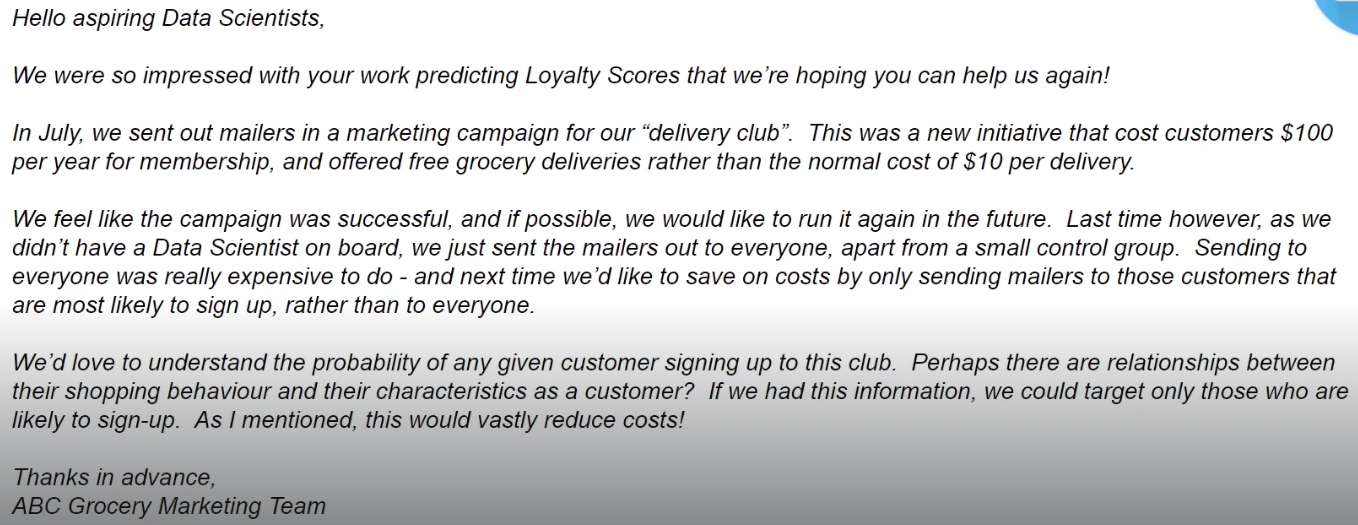

In [1]:
# import required packages
import pandas as pd
import pickle
import numpy as np
# import required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV

In [2]:
# # # import Data
# # data_path = "C:/Users/eacalder/Documents/Education/DataScienceInfinity/Leasson_Downloads/ABTesting/grocery_database.xlsx"
# # loyalty_scores = pd.read_excel(data_path, sheet_name = 'loyalty_scores') 
# # customer_details = pd.read_excel(data_path, sheet_name = 'customer_details') 
# # transactions = pd.read_excel(data_path, sheet_name = 'transactions') 
# # print(loyalty_scores.shape)
# # loyalty_scores.head()

In [3]:
# print(customer_details.shape)
# customer_details.head()

In [4]:
# print(transactions.shape)
# transactions.head()

In [5]:
# # Create customer level data set
# data_for_regression = pd.merge(customer_details,
#                                loyalty_scores, 
#                                how='left', 
#                                on='customer_id')
# print(data_for_regression.shape)
# data_for_regression.head(7)
# #you can clearly see some customers that do not have a loyalty score

In [6]:
# sales_summary =  transactions.groupby('customer_id').agg({'sales_cost':'sum',
#                                                           'num_items':'sum',
#                                                           'transaction_id':'count',
#                                                           'product_area_id': 'nunique'}).reset_index()
# print(sales_summary.shape)
# sales_summary.head()

In [7]:
# sales_summary.columns = ['customer_id', 'total_sales','total_items','transaction_count', 'product_area_count']
# print(sales_summary.shape)
# sales_summary.head()

In [8]:
# sales_summary['avg_basket_value'] = sales_summary['total_sales']/sales_summary['transaction_count']
# print(sales_summary.shape)
# sales_summary.head()

In [9]:
# data_for_regression_2 = pd.merge(data_for_regression,
#                                sales_summary, 
#                                how='inner', 
#                                on='customer_id')
# print(data_for_regression_2.shape)
# data_for_regression_2.head(7)
# # managed to gather all metrics that will help the machine 
# # learning model to predict the other 
# # half of the customers loyalty score

In [10]:
# regression_modeling = data_for_regression_2.loc[data_for_regression_2['customer_loyalty_score'].notna()]
# regression_scoring = data_for_regression_2.loc[data_for_regression_2['customer_loyalty_score'].isna()]
# print(regression_modeling.shape)
# regression_modeling.head()

In [11]:
# print(regression_scoring.shape)
# regression_scoring.head()

In [12]:
# regression_scoring.drop(['customer_loyalty_score'],axis=1,inplace=True)
# print(regression_scoring.shape)
# regression_scoring.head()

In [13]:
# # save our files
# pickle.dump(regression_modeling,open('Saved_files/Groc_regression_modeling.p','wb'))
# pickle.dump(regression_scoring,open('Saved_files/Groc_regression_scoring.p','wb'))

In [16]:
# import, learning to import using pickle files
data_for_model = pickle.load(open('Saved_files/abc_classification_modelling.p','rb'))

# we dont really need the id for the model
data_for_model.drop('customer_id', axis=1, inplace=True)
print(data_for_model.shape)
data_for_model.head()


(860, 9)


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,1,3.02,F,0.63,1566.35,182,30,5,52.211667


In [17]:
# shuffle data just in case it either came in in some order
# or we accidentally ordered it which will cause model to error
data_for_model = shuffle(data_for_model,random_state=42)
print(data_for_model.shape)
data_for_model.head()

(860, 9)


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381


In [18]:
# class balance, we want to see if there is an imbalance
data_for_model['signup_flag'].value_counts()

0    593
1    267
Name: signup_flag, dtype: int64

In [19]:
# not perfectly balanced but not too unperfectly balanced
# interesting to se the classification accuracy metric compares to 
# precision racall and f1
data_for_model['signup_flag'].value_counts(normalize = True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [20]:
######################################################
# deal with missing values
######################################################
data_for_model.isna().sum()
# small number of columns with missing values, lets not impute and just drop 
# but noted 

signup_flag             0
distance_from_store     5
gender                  5
credit_score            8
total_sales             0
total_items             0
transaction_count       0
product_area_count      0
average_basket_value    0
dtype: int64

In [21]:
# "any" meaning drop the whole row if any one cell is empty
data_for_model.dropna(how="any", inplace=True)
print(data_for_model.shape)
data_for_model.head()

(847, 9)


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381


In [22]:
######################################################
# deal with outliers
######################################################
outlier_investigation = data_for_model.describe()
print(outlier_investigation)
# some outliers in distance_from_store, total_sales, total_items
# all others did not spark any issues

       signup_flag  distance_from_store  credit_score  total_sales  \
count   847.000000           847.000000    847.000000   847.000000   
mean      0.304604             2.614545      0.597521   968.166411   
std       0.460512            14.397590      0.102264  1073.647531   
min       0.000000             0.000000      0.260000     2.090000   
25%       0.000000             0.730000      0.530000   383.940000   
50%       0.000000             1.640000      0.590000   691.640000   
75%       1.000000             2.920000      0.670000  1121.530000   
max       1.000000           400.970000      0.880000  7372.060000   

       total_items  transaction_count  product_area_count  \
count   847.000000         847.000000          847.000000   
mean    143.877214          22.214876            4.177096   
std     125.342694          11.721699            0.920887   
min       1.000000           1.000000            1.000000   
25%      77.000000          16.000000            4.000000   
50%

In [23]:
# we should invetigate this a bit more and in the future will do so
# for now to see what we get is important, not sure why
# i wrote boxplot approach
outlier_columns = ["distance_from_store", "total_sales", "total_items"]
for column in outlier_columns:
    lower_quartile = data_for_model[column].quantile(.25)
    upper_quartile = data_for_model[column].quantile(.75)
    iqr= upper_quartile - lower_quartile
    iqr_extend = iqr *2 # 1.5 reason i dont want to cut out too many outliers
    min_border = lower_quartile - iqr_extend
    max_border = upper_quartile + iqr_extend

    outliers = data_for_model[(data_for_model[column]<min_border)|(data_for_model[column]>max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")

    data_for_model.drop(outliers,inplace=True)

print(data_for_model.shape)
data_for_model.head()


8 outliers detected in column distance_from_store
54 outliers detected in column total_sales
3 outliers detected in column total_items
(782, 9)


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381


In [24]:
######################################################
# split input variables and output variables
######################################################
# we dont want the output in the input dataframe
X = data_for_model.drop(['signup_flag'], axis=1)
Y = data_for_model['signup_flag']

In [25]:
######################################################
# split out training and test sets
######################################################
# Regression model 
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y, 
                                                    test_size=.2,
                                                    random_state=42,
                                                    stratify=Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(625, 8)
(157, 8)
(625,)
(157,)


In [26]:
######################################################
# deal with categorical variables
######################################################
# gender
categorical_vars = ["gender"]
one_hot_encoder = OneHotEncoder(sparse=False, drop="first")# array is easier to use and viduallize 
# avoid dummy variable trap

In [27]:
# fit and transform on the training and only the transform on the test
# we do this because we want the encoding rules to be learned from the 
# training data and then applied to the new data 
X_train_encoded_vars_array = one_hot_encoder.fit_transform(x_train[categorical_vars])
X_test_encoded_vars_array = one_hot_encoder.transform(x_test[categorical_vars])
print(X_train_encoded_vars_array.shape)
print(X_test_encoded_vars_array.shape)

(625, 1)
(157, 1)


c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

In [29]:
X_train_encoded_vars_array = pd.DataFrame(X_train_encoded_vars_array,
                               columns=encoder_feature_names)
x_train = pd.concat([x_train.reset_index(drop=True),
                   X_train_encoded_vars_array.reset_index(drop=True)], 
                   axis=1)
# reset index to ensure no rows are not aligned
# drop the original input 2 and 3
x_train.drop(categorical_vars, axis=1,inplace=True)
print(x_train.shape)
print(x_train.head())

(625, 8)
   distance_from_store  credit_score  total_sales  total_items  \
0                 0.07          0.57       746.15          133   
1                 0.20          0.57       585.46          128   
2                 3.07          0.53      1151.24          226   
3                 2.86          0.77        14.03            8   
4                 0.52          0.52       656.48          121   

   transaction_count  product_area_count  average_basket_value  gender_M  
0                 24                   5             31.089583       1.0  
1                 32                   4             18.295625       1.0  
2                 35                   5             32.892571       0.0  
3                  2                   2              7.015000       0.0  
4                 16                   3             41.030000       1.0  


In [30]:
X_test_encoded_vars_array = pd.DataFrame(X_test_encoded_vars_array,
                               columns=encoder_feature_names)
x_test = pd.concat([x_test.reset_index(drop=True),
                   X_test_encoded_vars_array.reset_index(drop=True)], axis=1)
# reset index to ensure no rows are not aligned
# drop the original input 2 and 3
x_test.drop(categorical_vars, axis=1,inplace=True)
print(x_test.shape)
print(x_test.head())

(157, 8)
   distance_from_store  credit_score  total_sales  total_items  \
0                 2.03          0.69       266.74           57   
1                 2.27          0.49      1022.12          181   
2                 2.62          0.54       610.88          117   
3                 0.85          0.61       969.10          181   
4                 2.17          0.51       103.49           27   

   transaction_count  product_area_count  average_basket_value  gender_M  
0                  9                   4             29.637778       1.0  
1                 32                   3             31.941250       0.0  
2                 27                   5             22.625185       0.0  
3                 34                   5             28.502941       1.0  
4                  7                   4             14.784286       1.0  


In [31]:
######################################################
# feature selection
######################################################
clf = LogisticRegression(random_state=42,
                         max_iter=1000)# max iter default 100
feature_selector = RFECV(clf)

# trains the model and assess
fit = feature_selector.fit(x_train,y_train)
print(fit)

RFECV(estimator=LogisticRegression(max_iter=1000, random_state=42))


In [32]:
optimal_feature_count = feature_selector.n_features_
print(f"optimal number features: {optimal_feature_count}")
#it says 7 which is interesting because e have 8 total, so we are 
# wondering which one it has deemed worthy to drop we will find out
# when we put the chart together to show

optimal number features: 7


In [33]:
# we didnt really need to tun this becuse it sugested 
# all 8 columns but i ran just cause 

# unlike the previous comments we now find the below useful since 
# one of the input variables was dropped 
x_train  = x_train.loc[:,feature_selector.get_support()]
x_test  = x_test.loc[:,feature_selector.get_support()]
print(x_train)
print(x_test)

     distance_from_store  credit_score  total_items  transaction_count  \
0                   0.07          0.57          133                 24   
1                   0.20          0.57          128                 32   
2                   3.07          0.53          226                 35   
3                   2.86          0.77            8                  2   
4                   0.52          0.52          121                 16   
..                   ...           ...          ...                ...   
620                 0.39          0.72          146                 25   
621                 1.62          0.72          171                 20   
622                 2.60          0.65          123                 22   
623                 0.36          0.45          189                 20   
624                 1.36          0.59           95                 26   

     product_area_count  average_basket_value  gender_M  
0                     5             31.089583       1

in the other approaches there was guess work where as here it cut a lot of this and able to get reliable stuff

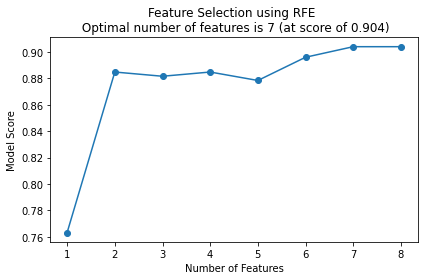

In [34]:
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), 
         fit.cv_results_['mean_test_score'], 
         marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()

In [35]:
######################################################
# model train
######################################################
clf = LogisticRegression()
clf.fit(x_train,y_train)

c:\Users\eacalder\.conda\envs\DSInfinity\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
######################################################
# model assessment
######################################################
# # Predict on the Test Set 
# y_pred = regressor.predict(x_test)

# assess model accuracy, test how well it classifies our data 
y_pred_class = clf.predict(x_test)
print(y_pred_class)

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0]


In [38]:
# # Calculate R-Squared 
# r_squared = r2_score(y_test,y_pred)
# print(r_squared)

In [37]:
# # Cross Validation 
# cv = KFold(n_splits=4,shuffle=True,random_state=42)
# cv_scores =cross_val_score(regressor,x_train,y_train,cv=cv,scoring="r2")
# print(cv_scores)

# we can ask for the probabilities instead
y_pred_prob = clf.predict_proba(x_test)
print(y_pred_prob)

[[9.94788765e-01 5.21123513e-03]
 [7.24513115e-01 2.75486885e-01]
 [1.95751379e-01 8.04248621e-01]
 [9.67671563e-01 3.23284373e-02]
 [9.95618271e-01 4.38172890e-03]
 [6.64773354e-02 9.33522665e-01]
 [9.99953882e-01 4.61176865e-05]
 [9.17945760e-01 8.20542401e-02]
 [9.99990748e-01 9.25227849e-06]
 [9.99872838e-01 1.27162030e-04]
 [9.76339918e-01 2.36600819e-02]
 [9.94681259e-01 5.31874120e-03]
 [9.95209780e-01 4.79021984e-03]
 [9.27882716e-01 7.21172838e-02]
 [9.87004394e-01 1.29956062e-02]
 [5.53411322e-01 4.46588678e-01]
 [9.82444111e-01 1.75558894e-02]
 [9.99668928e-01 3.31072144e-04]
 [9.94117773e-01 5.88222714e-03]
 [9.52047179e-01 4.79528207e-02]
 [3.10226103e-01 6.89773897e-01]
 [3.21247928e-01 6.78752072e-01]
 [1.89456355e-01 8.10543645e-01]
 [4.91671385e-01 5.08328615e-01]
 [9.98654171e-01 1.34582947e-03]
 [9.97878423e-01 2.12157657e-03]
 [9.93777311e-01 6.22268862e-03]
 [6.82289941e-01 3.17710059e-01]
 [7.02349902e-01 2.97650098e-01]
 [8.59807151e-01 1.40192849e-01]
 [1.924671

In [39]:
# redundant to have class 1 and 0 probabilities, later this will 
# be an input for something else that asks only for 1 so lets pisk one
# instead of having two. pick class of 1 
y_pred_prob = clf.predict_proba(x_test)[:,1] # prob they belong in class 1
print(y_pred_prob)

[5.21123513e-03 2.75486885e-01 8.04248621e-01 3.23284373e-02
 4.38172890e-03 9.33522665e-01 4.61176865e-05 8.20542401e-02
 9.25227849e-06 1.27162030e-04 2.36600819e-02 5.31874120e-03
 4.79021984e-03 7.21172838e-02 1.29956062e-02 4.46588678e-01
 1.75558894e-02 3.31072144e-04 5.88222714e-03 4.79528207e-02
 6.89773897e-01 6.78752072e-01 8.10543645e-01 5.08328615e-01
 1.34582947e-03 2.12157657e-03 6.22268862e-03 3.17710059e-01
 2.97650098e-01 1.40192849e-01 8.07532880e-01 9.99384357e-01
 2.91141022e-01 1.13848405e-02 1.97046705e-01 5.07795236e-05
 9.89419487e-01 7.12547671e-02 1.28717500e-04 7.03856903e-01
 6.13225558e-04 1.32937517e-02 2.20543266e-02 2.39510395e-01
 8.07899314e-03 5.54986031e-02 8.65919574e-01 2.00671245e-02
 4.69631115e-02 7.78436249e-03 1.97855854e-01 1.97016350e-01
 6.06616941e-01 7.20560057e-02 8.95171296e-02 1.81122357e-02
 9.04623050e-01 7.01821922e-01 1.54608910e-01 3.53972941e-01
 8.90888597e-01 6.66345580e-01 1.02063463e-02 2.15442051e-02
 5.09815876e-01 2.622674

In [40]:
# cv_scores.mean()

# confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_class)

C:\Users\eacalder\AppData\Local\Temp\1/ipykernel_31808/1226968707.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


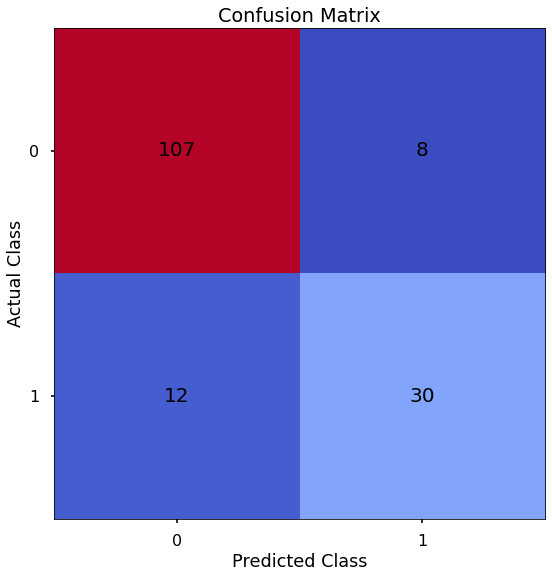

In [41]:
# # Calculate Adjusted R-Squared
# num_data_points, num_input_vars = x_test.shape 
# print(x_test.shape) 

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class") 
plt.xlabel("Predicted Class")
# dont hve to go through just understand and look up if need to
for (i, j), corr_value in np.ndenumerate (conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show() 

Accuracy( the number of correct classifications out of all attempted classifications)

In [42]:
accuracy_score(y_test,y_pred_class)

0.8726114649681529

looks good but rememeber we had that impbalance in the beginning


Precision( of all observations that were predicted as positive, how many were actually positive)

In [43]:
precision_score(y_test,y_pred_class)

0.7894736842105263

Recall(of all positive observations, how many did we predict as positive?)

In [44]:
recall_score(y_test,y_pred_class)

0.7142857142857143

f-1 Score(harmonic mean of precision and recall)

In [45]:
f1_score(y_test,y_pred_class)

0.7500000000000001

optimal probability threshold

just because 50% is the default thrshold does not mean it is the best one
we need to evaluated all possible thresholds for the optimal performance

In [47]:
thresholds = np.arange(0,1,.01)
print(thresholds)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [48]:
precision_scores = []
recall_scores = []
f1_scores = []

In [49]:
for threshold in thresholds:
    pred_class = (y_pred_prob >= threshold)*1

    precision = precision_score(y_test,pred_class, zero_division=0) # we wont get errors for super high super low 
    precision_scores.append(precision)
    
    recall = recall_score(y_test,pred_class) 
    recall_scores.append(recall)

    f1 = f1_score(y_test,pred_class, ) 
    f1_scores.append(f1)

In [51]:
# shows the scores of all the possible thresholds 
max_f1 = max(f1_scores)
max_f1_idx = f1_scores.index(max(f1_scores))
print(max_f1, max_f1_idx)


0.7954545454545455 32


C:\Users\eacalder\AppData\Local\Temp\1/ipykernel_31808/4116737971.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


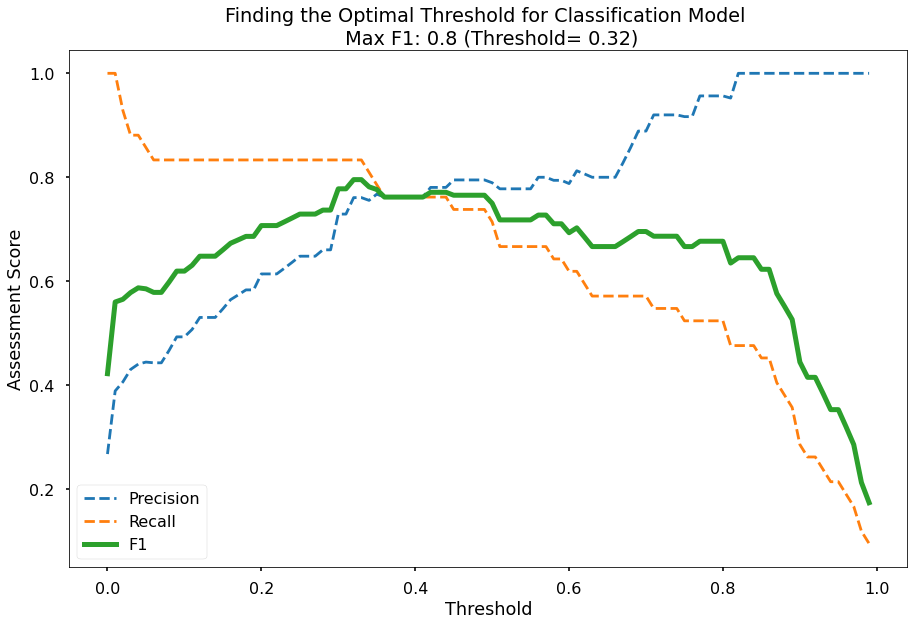

In [52]:
plt.style.use("seaborn-poster")
plt.plot(thresholds, precision_scores, label = "Precision", linestyle = "--")
plt.plot(thresholds, recall_scores, label = "Recall", linestyle = "--")
plt.plot(thresholds, f1_scores, label = "F1", linewidth = 5)
plt.title(f"Finding the Optimal Threshold for Classification Model \n Max F1: {round(max_f1,2)} (Threshold= {round(thresholds[max_f1_idx],2)})")
plt.xlabel("Threshold")
plt.ylabel("Assessment Score")
plt.legend (loc= "lower left")
plt.tight_layout()
plt.show()

In [53]:
optimal_threshold = .32
y_pred_class_opt_thresh = (y_pred_prob >= optimal_threshold) * 1
print(y_pred_class_opt_thresh)

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0]
